In [1]:
# Make module from local packages importable
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
file_path = "../data/raw/csv/adni_aibl.csv"
df = pd.read_csv(file_path)

In [4]:
df

,health_ad,patient_label,sex,health_emci,health_lmci,health_smc,dataset,health_mci,study_patient_id,healthy,age,study_id,study_image_id,image_label
0,0,002_S_0295,0,0,0,0,train,0,93801557,1,84,0,13721,13721
1,0,002_S_0295,0,0,0,0,train,0,93801557,1,84,0,13722,13722
2,0,002_S_0295,0,0,0,0,train,0,93801557,1,85,0,28560,28560
3,0,002_S_0295,0,0,0,0,train,0,93801557,1,85,0,28561,28561
4,0,002_S_0295,0,0,0,0,train,0,93801557,1,86,0,55275,55275
5,0,002_S_0295,0,0,0,0,train,0,93801557,1,86,0,55276,55276
6,0,002_S_0295,0,0,0,0,train,0,93801557,1,87,0,114209,114209
7,0,002_S_0295,0,0,0,0,train,0,93801557,1,87,0,114210,114210
8,0,002_S_0295,0,0,0,0,train,0,93801557,1,88,0,144446,144446
9,0,002_S_0295,0,0,0,0,train,0,93801557,1,88,0,144447,144447


# Different statistics about the number of images available

In [5]:
# Number of different patients
patient_labels = df.patient_label.unique()
print("Number of patients: {}".format(len(patient_labels)))

Number of patients: 2458


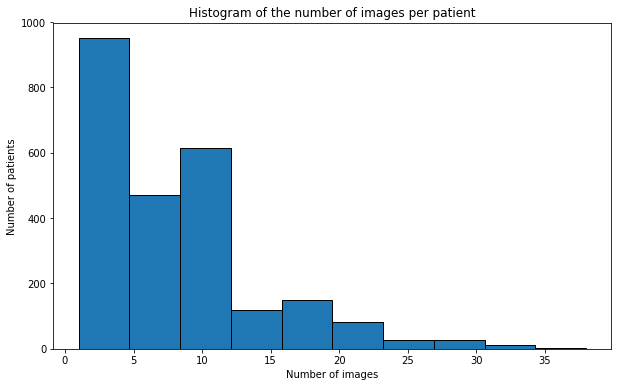

In [6]:
# Histogram of the number of images per patient
patient_count = df.groupby('patient_label').study_image_id.count()
plt.figure(figsize=(10,6))
patient_count.plot.hist(edgecolor='black')
plt.title("Histogram of the number of images per patient")
plt.xlabel("Number of images")
plt.ylabel("Number of patients")
plt.show()

In [7]:
# Patients with at least two images
patient_count = df.groupby('patient_label').study_image_id.count()
patient_count.columns = ['patient_label', "n_images"]

In [8]:
at_least_two = patient_count[patient_count >= 2]

In [9]:
print(patient_count.shape)
print(at_least_two.shape)

(2458,)
(2042,)


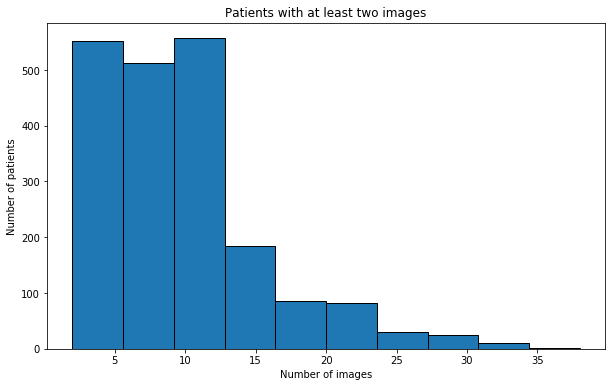

In [10]:
plt.figure(figsize=(10,6))
at_least_two.plot.hist(edgecolor='black')
plt.title("Patients with at least two images")
plt.xlabel("Number of images")
plt.ylabel("Number of patients")
plt.show()

In [11]:
# At least two images with the same age
patient_count_by_age = df.groupby(['patient_label', 'age']).study_image_id.count()

In [12]:
patient_count_by_age = patient_count_by_age.reset_index()
patient_count_by_age = patient_count_by_age.rename({"study_image_id": "n_images"}, axis='columns')
at_least_two = patient_count_by_age[patient_count_by_age.n_images >= 2]
print(patient_count_by_age.shape)
print(at_least_two.shape)

(7167, 3)
(5979, 3)


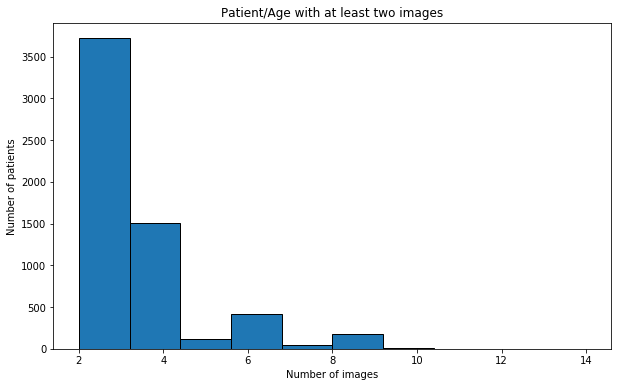

In [13]:
plt.figure(figsize=(10,6))
at_least_two.n_images.plot.hist(edgecolor='black')
plt.title("Patient/Age with at least two images")
plt.xlabel("Number of images")
plt.ylabel("Number of patients")
plt.show()

In [14]:
# Number of patients with at least two images per age
patient_labels = at_least_two.patient_label.unique()
len(patient_labels)

1843

# Diagnosis changes for patients

In [15]:
for r in df.to_dict('records'):
    print(r)

{'health_ad': 0, 'patient_label': '002_S_0295', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 93801557, 'healthy': 1, 'age': 84, 'study_id': 0, 'study_image_id': 13721, 'image_label': '13721'}
{'health_ad': 0, 'patient_label': '002_S_0295', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 93801557, 'healthy': 1, 'age': 84, 'study_id': 0, 'study_image_id': 13722, 'image_label': '13722'}
{'health_ad': 0, 'patient_label': '002_S_0295', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 93801557, 'healthy': 1, 'age': 85, 'study_id': 0, 'study_image_id': 28560, 'image_label': '28560'}
{'health_ad': 0, 'patient_label': '002_S_0295', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 93801557, 'healthy': 1, 'age': 

{'health_ad': 0, 'patient_label': '009_S_4612', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 34360795, 'healthy': 1, 'age': 70, 'study_id': 0, 'study_image_id': 424034, 'image_label': '424034'}
{'health_ad': 0, 'patient_label': '009_S_4612', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 34360795, 'healthy': 1, 'age': 70, 'study_id': 0, 'study_image_id': 424035, 'image_label': '424035'}
{'health_ad': 0, 'patient_label': '009_S_4741', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 43360782, 'healthy': 0, 'age': 61, 'study_id': 0, 'study_image_id': 310555, 'image_label': '310555'}
{'health_ad': 0, 'patient_label': '009_S_4741', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 43360782, 'healthy': 0, '

{'health_ad': 1, 'patient_label': '016_S_1326', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 88055624, 'healthy': 0, 'age': 69, 'study_id': 0, 'study_image_id': 174005, 'image_label': '174005'}
{'health_ad': 1, 'patient_label': '016_S_1326', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 88055624, 'healthy': 0, 'age': 70, 'study_id': 0, 'study_image_id': 233787, 'image_label': '233787'}
{'health_ad': 1, 'patient_label': '016_S_1326', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 88055624, 'healthy': 0, 'age': 70, 'study_id': 0, 'study_image_id': 233790, 'image_label': '233790'}
{'health_ad': 1, 'patient_label': '016_S_1326', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 88055624, 'healthy': 0, '

{'health_ad': 0, 'patient_label': '022_S_2087', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 74182270, 'healthy': 0, 'age': 70, 'study_id': 0, 'study_image_id': 238596, 'image_label': '238596'}
{'health_ad': 0, 'patient_label': '022_S_2087', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 74182270, 'healthy': 0, 'age': 70, 'study_id': 0, 'study_image_id': 238597, 'image_label': '238597'}
{'health_ad': 0, 'patient_label': '022_S_2087', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 74182270, 'healthy': 0, 'age': 70, 'study_id': 0, 'study_image_id': 267891, 'image_label': '267891'}
{'health_ad': 0, 'patient_label': '022_S_2087', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 74182270, 'healthy': 0, '

{'health_ad': 0, 'patient_label': '027_S_2336', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 29350414, 'healthy': 0, 'age': 73, 'study_id': 0, 'study_image_id': 224440, 'image_label': '224440'}
{'health_ad': 0, 'patient_label': '027_S_2336', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 29350414, 'healthy': 0, 'age': 73, 'study_id': 0, 'study_image_id': 224450, 'image_label': '224450'}
{'health_ad': 0, 'patient_label': '027_S_2336', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 29350414, 'healthy': 0, 'age': 73, 'study_id': 0, 'study_image_id': 243446, 'image_label': '243446'}
{'health_ad': 0, 'patient_label': '027_S_2336', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 1, 'study_patient_id': 29350414, 'healthy': 0, '

{'health_ad': 0, 'patient_label': '036_S_0672', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 44982103, 'healthy': 1, 'age': 62, 'study_id': 0, 'study_image_id': 19462, 'image_label': '19462'}
{'health_ad': 0, 'patient_label': '036_S_0672', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 44982103, 'healthy': 1, 'age': 62, 'study_id': 0, 'study_image_id': 39398, 'image_label': '39398'}
{'health_ad': 0, 'patient_label': '036_S_0672', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 44982103, 'healthy': 1, 'age': 62, 'study_id': 0, 'study_image_id': 39399, 'image_label': '39399'}
{'health_ad': 0, 'patient_label': '036_S_0672', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 44982103, 'healthy': 1, 'age': 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [62]:
df.groupby(['patient_label', 'age', 'healthy']).study_image_id.count().reset_index()

,patient_label,age,healthy,study_image_id
0,002_S_0295,84,1,2
1,002_S_0295,85,1,2
2,002_S_0295,86,1,2
3,002_S_0295,87,1,2
4,002_S_0295,88,1,2
5,002_S_0295,89,1,2
6,002_S_0295,90,1,2
7,002_S_0295,91,1,2
8,002_S_0413,76,1,8
9,002_S_0413,77,1,4


In [60]:
df = pd.read_csv(file_path)
records = df.to_dict('records')
# sort by label then by age, then by study_image_id

In [61]:
from operator import itemgetter as i
from functools import cmp_to_key

def cmp(a, b):
    return (a > b) - (a < b) 

def multikeysort(items, columns):
    comparers = [
        ((i(col[1:].strip()), -1) if col.startswith('-') else (i(col.strip()), 1))
        for col in columns
    ]
    def comparer(left, right):
        comparer_iter = (
            cmp(fn(left), fn(right)) * mult
            for fn, mult in comparers
        )
        return next((result for result in comparer_iter if result), 0)
    return sorted(items, key=cmp_to_key(comparer))

records = multikeysort(records, ['patient_label', 'age', 'study_image_id'])

In [77]:
import itertools
# Find patients for which the diagnosis changes (assuming records are ordered from earliest to latest)
patient_labels = []
classes = ["health_ad", "health_mci", "healthy"]
transitions = list(itertools.product(classes, classes))
trans_count = {}
trans_labels = {}
for t in transitions:
    trans_count[t] = 0
    trans_labels[t] = []

hc_to_ad = []
ad_to_hc = []
for i, r in enumerate(records):
    if i == 0:
        continue
        
    last = records[i - 1]

    if (r["patient_label"] == last["patient_label"]) and (r["healthy"] != last["healthy"]):
        patient_labels.append(r["patient_label"])
        if r["healthy"] == 1:
            ad_to_hc.append(r["patient_label"])
        else:
            hc_to_ad.append(r["patient_label"])

            
    if r["patient_label"] == last["patient_label"]:
        for a, b in transitions:
            if a == b:
                continue

            if (last[a] == 1) and (r[b] == 1):
                trans_count[(a, b)] += 1
                trans_labels[(a, b)].append(r["patient_label"])
                

In [78]:
print(len(patient_labels))
print(len(set(patient_labels)))

175
145


In [79]:
len(hc_to_ad)

111

In [80]:
len(ad_to_hc)

64

In [81]:
for k in trans_count:
    print("{}: {}, nbr distinct: {}".format(k, trans_count[k], len(set(trans_labels[k]))))

('health_ad', 'health_ad'): 0, nbr distinct: 0
('health_ad', 'health_mci'): 16, nbr distinct: 16
('health_ad', 'healthy'): 0, nbr distinct: 0
('health_mci', 'health_ad'): 299, nbr distinct: 293
('health_mci', 'health_mci'): 0, nbr distinct: 0
('health_mci', 'healthy'): 64, nbr distinct: 60
('healthy', 'health_ad'): 9, nbr distinct: 9
('healthy', 'health_mci'): 102, nbr distinct: 98
('healthy', 'healthy'): 0, nbr distinct: 0


In [82]:
for label in trans_labels[('health_mci', 'health_ad')]:
    c = trans_labels[('health_mci', 'health_ad')].count(label)
    if c > 1:
        print("{}: {}".format(label, c))

009_S_4741: 2
009_S_4741: 2
011_S_2274: 2
011_S_2274: 2
016_S_0702: 2
016_S_0702: 2
031_S_4947: 2
031_S_4947: 2
036_S_4430: 2
036_S_4430: 2
128_S_0135: 2
128_S_0135: 2


# Class distribution

In [16]:
df.groupby('health_emci').patient_label.count()

health_emci
0    19762
Name: patient_label, dtype: int64

In [17]:
df.groupby('health_lmci').patient_label.count()

health_lmci
0    19762
Name: patient_label, dtype: int64

In [18]:
df.groupby('health_smc').patient_label.count()

health_smc
0    19762
Name: patient_label, dtype: int64

### Mild cognitive impairment

In [19]:
df.groupby('health_mci').patient_label.count()

health_mci
0    11094
1     8668
Name: patient_label, dtype: int64

In [24]:
df.groupby(['healthy', 'health_mci']).patient_label.count()

healthy  health_mci
0        0             4476
         1             8668
1        0             6618
Name: patient_label, dtype: int64

In [25]:
df.groupby(['health_ad', 'health_mci']).patient_label.count()

health_ad  health_mci
0          0             6618
           1             8668
1          0             4476
Name: patient_label, dtype: int64

### AD, MCI, HC

In [26]:
df.groupby('healthy').patient_label.count()

healthy
0    13144
1     6618
Name: patient_label, dtype: int64

In [27]:
df.groupby('health_ad').patient_label.count()

health_ad
0    15286
1     4476
Name: patient_label, dtype: int64

In [32]:
df.groupby(['healthy', 'health_ad', 'health_mci']).patient_label.count() / df.shape[0]

healthy  health_ad  health_mci
0        0          1             0.438620
         1          0             0.226495
1        0          0             0.334885
Name: patient_label, dtype: float64

In [41]:
df.groupby(['healthy', 'health_ad', 'health_mci']).patient_label.count()

healthy  health_ad  health_mci
0        0          1             8668
         1          0             4476
1        0          0             6618
Name: patient_label, dtype: int64

In [34]:
df.shape

(19762, 14)

In [35]:
df.groupby(['healthy', 'health_ad', 'health_mci']).patient_label.count().sum()

19762

### By gender

In [89]:
df.groupby(['healthy', 'health_ad', 'health_mci', 'sex']).patient_label.count().to_latex("adni_aibl_summ_counts.csv", header=True)
df.groupby(['healthy', 'health_ad', 'health_mci', 'sex']).patient_label.count()

healthy  health_ad  health_mci  sex
0        0          1           0      5275
                                1      3393
         1          0           0      2515
                                1      1961
1        0          0           0      3265
                                1      3353
Name: patient_label, dtype: int64

In [90]:
(df.groupby(['healthy', 'health_ad', 'health_mci', 'sex']).patient_label.count() / df.shape[0]).to_latex("adni_aibl_summ_perc.csv", header=True)

### Apply some filters before computing stats

In [47]:
# f = df.groupby('patient_label', group_keys=False).apply(lambda df: df.sample(1))  # keep one row per patient

In [48]:
f.groupby(['healthy', 'health_ad', 'health_mci', 'sex']).patient_label.count()

healthy  health_ad  health_mci  sex
0        0          1           0      5275
                                1      3393
         1          0           0      2515
                                1      1961
1        0          0           0      3265
                                1      3353
Name: patient_label, dtype: int64

In [49]:
f.groupby(['healthy', 'health_ad', 'health_mci', 'sex']).patient_label.count() / df.shape[0]

healthy  health_ad  health_mci  sex
0        0          1           0      0.266926
                                1      0.171693
         1          0           0      0.127264
                                1      0.099231
1        0          0           0      0.165216
                                1      0.169669
Name: patient_label, dtype: float64

In [52]:
df.groupby('patient_label', group_keys=False).apply(lambda df: df.sample(1)).shape

(2458, 14)

2458